In [1]:
import pandas as pd

In [7]:
liq = pd.read_csv("https://data.iowa.gov/api/views/m3tr-qhgy/rows.csv?accessType=DOWNLOAD", dtype = {'Store Number': str, 'Zip Code': str, 'Category': str, 'Vendor Number': str, 'Item Number': str})

In [8]:
liq.shape

(10286538, 24)

In [9]:
liq.describe(include='all')

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,10286538,10286538,10286538,10286538,10286175,10286175,10286130,10286175,1.020937e+07,10209372,...,10286538,10286538,1.028654e+07,1.028654e+07,10286528,10286528,1.028654e+07,10286528,1.028654e+07,1.028654e+07
unique,10286538,1119,1722,1790,2955,778,439,3894,NaN,200,...,6503,5020,NaN,NaN,2612,3059,NaN,23028,NaN,NaN
top,S32829000013,12/29/2014,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,52402,"3221 SE 14TH ST\nDES MOINES 50320\n(41.554101,...",NaN,Polk,...,11788,Black Velvet,NaN,NaN,$8.25,$12.38,NaN,$162.00,NaN,NaN
freq,1,15996,91900,91900,110543,811086,252142,81420,NaN,1784687,...,105535,270918,NaN,NaN,181893,128709,NaN,66054,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.724258e+01,NaN,...,NaN,NaN,1.217944e+01,9.318514e+02,NaN,NaN,9.461806e+00,NaN,8.729611e+00,2.306062e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.724657e+01,NaN,...,NaN,NaN,7.370361e+00,6.484563e+02,NaN,NaN,2.428039e+01,NaN,2.938021e+01,7.761483e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,...,NaN,NaN,1.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.100000e+01,NaN,...,NaN,NaN,6.000000e+00,7.500000e+02,NaN,NaN,2.000000e+00,NaN,1.500000e+00,4.000000e-01
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.200000e+01,NaN,...,NaN,NaN,1.200000e+01,7.500000e+02,NaN,NaN,6.000000e+00,NaN,4.500000e+00,1.190000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.700000e+01,NaN,...,NaN,NaN,1.200000e+01,1.000000e+03,NaN,NaN,1.200000e+01,NaN,1.050000e+01,2.770000e+00


In [10]:
liq.columns

Index([u'Invoice/Item Number', u'Date', u'Store Number', u'Store Name',
       u'Address', u'City', u'Zip Code', u'Store Location', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Vendor Name', u'Item Number', u'Item Description', u'Pack',
       u'Bottle Volume (ml)', u'State Bottle Cost', u'State Bottle Retail',
       u'Bottles Sold', u'Sale (Dollars)', u'Volume Sold (Liters)',
       u'Volume Sold (Gallons)'],
      dtype='object')

In [13]:
liq.drop(['Invoice/Item Number', 'Store Name', 'Store Location', 'County', 'Vendor Name', 'Item Number', 'Item Description', 'State Bottle Cost', 'Volume Sold (Gallons)'], axis=1, inplace=True)

In [14]:
liq.columns = liq.columns.str.lower().str.replace(' ', '_').str.replace('(', "").str.replace(')', "")

In [16]:
liq.date = pd.to_datetime(liq.date, format='%m/%d/%Y')

In [17]:
liq.columns

Index([u'date', u'store_number', u'address', u'city', u'zip_code',
       u'county_number', u'category', u'category_name', u'vendor_number',
       u'pack', u'bottle_volume_ml', u'state_bottle_retail', u'bottles_sold',
       u'sale_dollars', u'volume_sold_liters'],
      dtype='object')

In [24]:
liq['year'] = liq.date.apply(lambda d: str(d.year))
liq['month']  = liq.date.apply(lambda d: str(d.month))

In [22]:
liq.head()

,date,store_number,address,city,zip_code,county_number,category,category_name,vendor_number,pack,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month
0,2015-11-20,2191,1013 MAIN,KEOKUK,52632,56.0,NaN,NaN,255,6,750,$27.14,6,$162.84,4.50,2015,11
1,2015-11-21,2205,900 E WASHINGTON,CLARINDA,51632,73.0,NaN,NaN,255,6,750,$27.14,12,$325.68,9.00,2015,11
2,2015-11-16,3549,1414 48TH ST,FORT MADISON,52627,56.0,NaN,NaN,130,20,150,$9.60,2,$19.20,0.30,2015,11
3,2015-11-04,2513,812 S 1ST AVE,IOWA CITY,52240,52.0,NaN,NaN,65,3,1750,$53.34,3,$160.02,5.25,2015,11
4,2015-11-17,3942,104 HIGHWAY 30 WEST,TOLEDO,52342,86.0,NaN,NaN,130,20,150,$9.60,2,$19.20,0.30,2015,11


In [46]:
liq.sale_dollars = liq.sale_dollars.str.strip('$').astype(float)

In [47]:
liq.head()

,date,store_number,address,city,zip_code,county_number,category,category_name,vendor_number,pack,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month
0,2015-11-20,2191,1013 MAIN,KEOKUK,52632,56.0,NaN,NaN,255,6,750,$27.14,6,162.84,4.50,2015,11
1,2015-11-21,2205,900 E WASHINGTON,CLARINDA,51632,73.0,NaN,NaN,255,6,750,$27.14,12,325.68,9.00,2015,11
2,2015-11-16,3549,1414 48TH ST,FORT MADISON,52627,56.0,NaN,NaN,130,20,150,$9.60,2,19.20,0.30,2015,11
3,2015-11-04,2513,812 S 1ST AVE,IOWA CITY,52240,52.0,NaN,NaN,65,3,1750,$53.34,3,160.02,5.25,2015,11
4,2015-11-17,3942,104 HIGHWAY 30 WEST,TOLEDO,52342,86.0,NaN,NaN,130,20,150,$9.60,2,19.20,0.30,2015,11


In [48]:
min_liq = liq[['date', 'month', 'year', 'county_number', 'sale_dollars']]

In [49]:
min_liq.dtypes

date             datetime64[ns]
month                    object
year                     object
county_number           float64
sale_dollars            float64
dtype: object

In [66]:
by_county_2015 = min_liq[['county_number', 'sale_dollars']][min_liq.year=='2015'].groupby(by='county_number', as_index=False).aggregate(sum)  

In [67]:
by_county_2015.head()

,county_number,sale_dollars
0,1.0,424750.82
1,2.0,100596.80
2,3.0,823579.28
3,4.0,835381.93
4,5.0,173849.23


In [68]:
by_county_2016 = min_liq[['county_number', 'sale_dollars']][min_liq.year=='2016'].groupby(by='county_number', as_index=False).aggregate(sum)  

In [69]:
by_county_2016.head()

,county_number,sale_dollars
0,1.0,334662.16
1,2.0,64873.36
2,3.0,652773.97
3,4.0,640845.06
4,5.0,111367.14


In [70]:
by_county_jan2015 = min_liq[['county_number', 'sale_dollars']][(min_liq.year=='2015') & (min_liq.month=='1')].groupby(by='county_number', as_index=False).aggregate(sum)  

In [71]:
by_county_jan2015.head()

,county_number,sale_dollars
0,1.0,32221.04
1,2.0,4962.48
2,3.0,46675.93
3,4.0,53353.26
4,5.0,11089.17


In [72]:
by_county_feb2015 = min_liq[['county_number', 'sale_dollars']][(min_liq.year=='2015') & (min_liq.month=='2')].groupby(by='county_number', as_index=False).aggregate(sum)  

In [73]:
by_county_feb2015.head()

,county_number,sale_dollars
0,1.0,32409.62
1,2.0,6759.18
2,3.0,53786.16
3,4.0,51942.64
4,5.0,14201.39


In [74]:
by_county_mar2015 = min_liq[['county_number', 'sale_dollars']][(min_liq.year=='2015') & (min_liq.month=='3')].groupby(by='county_number', as_index=False).aggregate(sum)  

In [75]:
by_county_mar2015.head()

,county_number,sale_dollars
0,1.0,38925.65
1,2.0,8613.37
2,3.0,55526.87
3,4.0,46459.58
4,5.0,13983.90


In [76]:
by_county_jan2016 = min_liq[['county_number', 'sale_dollars']][(min_liq.year=='2016') & (min_liq.month=='1')].groupby(by='county_number', as_index=False).aggregate(sum)  

In [77]:
by_county_jan2016.head()

,county_number,sale_dollars
0,1.0,28266.55
1,2.0,6362.56
2,3.0,48475.58
3,4.0,50446.38
4,5.0,9908.69


In [78]:
by_county_feb2016 = min_liq[['county_number', 'sale_dollars']][(min_liq.year=='2016') & (min_liq.month=='2')].groupby(by='county_number', as_index=False).aggregate(sum)  

In [79]:
by_county_feb2016.head()

,county_number,sale_dollars
0,1.0,40811.12
1,2.0,6518.86
2,3.0,57804.08
3,4.0,54435.54
4,5.0,15653.60


In [80]:
by_county_mar2016 = min_liq[['county_number', 'sale_dollars']][(min_liq.year=='2016') & (min_liq.month=='3')].groupby(by='county_number', as_index=False).aggregate(sum)  

In [81]:
by_county_mar2016.head()

,county_number,sale_dollars
0,1.0,36351.64
1,2.0,8953.07
2,3.0,73837.64
3,4.0,72002.38
4,5.0,11551.28


In [84]:
merged2015 = pd.merge(by_county_2015, by_county_jan2015, how='inner', on='county_number', suffixes=['_all2015', '_jan2015'])
merged2015 = pd.merge(merged2015, by_county_feb2015, how='inner', on='county_number', suffixes=['_jan2015', '_feb2015'])
merged2015 = pd.merge(merged2015, by_county_mar2015, how='inner', on='county_number', suffixes=['__feb2015', '_mar2015'])
merged2015.head()

,county_number,sale_dollars_all2015,sale_dollars_jan2015,sale_dollars__feb2015,sale_dollars_mar2015
0,1.0,424750.82,32221.04,32409.62,38925.65
1,2.0,100596.80,4962.48,6759.18,8613.37
2,3.0,823579.28,46675.93,53786.16,55526.87
3,4.0,835381.93,53353.26,51942.64,46459.58
4,5.0,173849.23,11089.17,14201.39,13983.90


In [86]:
merged2015.ix[:, 1:].corr()

,sale_dollars_all2015,sale_dollars_jan2015,sale_dollars__feb2015,sale_dollars_mar2015
sale_dollars_all2015,1.000000,0.999043,0.998472,0.998043
sale_dollars_jan2015,0.999043,1.000000,0.997699,0.997296
sale_dollars__feb2015,0.998472,0.997699,1.000000,0.998247
sale_dollars_mar2015,0.998043,0.997296,0.998247,1.000000


In [208]:
merged2015['sale_dollars_2015Q1'] = merged2015.sale_dollars_jan2015 + merged2015.sale_dollars__feb2015 + merged2015.sale_dollars_mar2015

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
import statsmodels.api as sm
import patsy

In [209]:
y, X = patsy.dmatrices('sale_dollars_all2015 ~ sale_dollars_2015Q1', data=merged2015)
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     sale_dollars_all2015   R-squared:                       0.998
Model:                              OLS   Adj. R-squared:                  0.998
Method:                   Least Squares   F-statistic:                 6.151e+04
Date:                  Sat, 12 Nov 2016   Prob (F-statistic):          9.34e-138
Time:                          12:45:08   Log-Likelihood:                -1387.1
No. Observations:                    99   AIC:                             2778.
Df Residuals:                        97   BIC:                             2783.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept            -2.25e+04   3.21e+04     -0.701      0.485     -8.62e+04  4.12e+04
sale_dollars_2015Q1     4.5500      0.018    248.005      0.000         4.514     4.586
==============================================================================
Omnibus:                       35.560   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              789.223
Skew:                           0.003   Prob(JB):                    4.19e-172
Kurtosis:                      16.832   Cond. No.                     1.88e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
len(merged2015['sale_dollars_all2015'])

99

Cross-validated scores: [ 0.98768569  0.9957228   0.99770709]
Cross-Predicted Accuracy: 0.99685771212
[ 0.        4.545488]


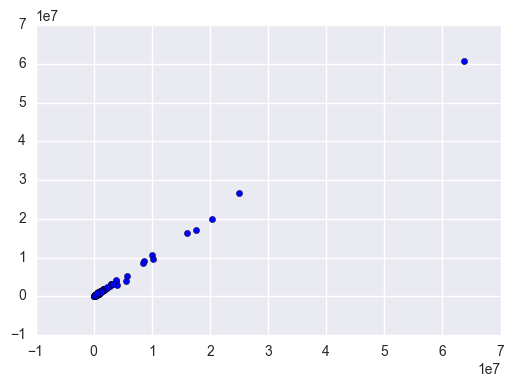

In [210]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics,linear_model
import patsy

y = merged2015['sale_dollars_all2015']
X = merged2015[['sale_dollars_2015Q1']]
X = sm.add_constant(X)

lm = linear_model.LassoCV()
model = lm.fit(X, y)
# Perform 6-fold cross validation

scores = cross_val_score(model, X, y, cv=3)
print "Cross-validated scores:", scores
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=3)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy
print model.coef_

Cross-validated scores: [ 0.9876328   0.99565173  0.99852227]
Cross-Predicted Accuracy: 0.997472265583
[ 0.          4.55003804]


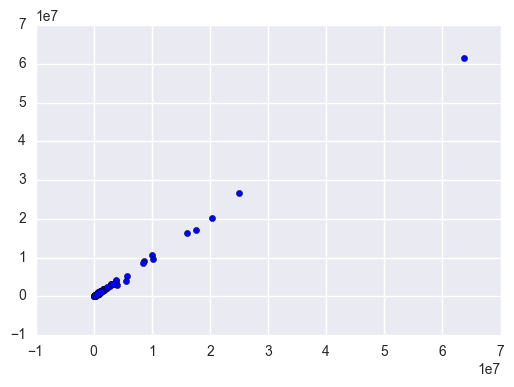

In [211]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics,linear_model
import patsy

y = merged2015['sale_dollars_all2015']
X = merged2015[['sale_dollars_2015Q1']]
X = sm.add_constant(X)

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
# Perform 6-fold cross validation

scores = cross_val_score(model, X, y, cv=3)
print "Cross-validated scores:", scores
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=3)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy
print model.coef_

Cross-validated scores: [-1.8736271   0.87601355  0.99866744]
Cross-Predicted Accuracy: 0.810849051943
[ 0.          7.48925781]


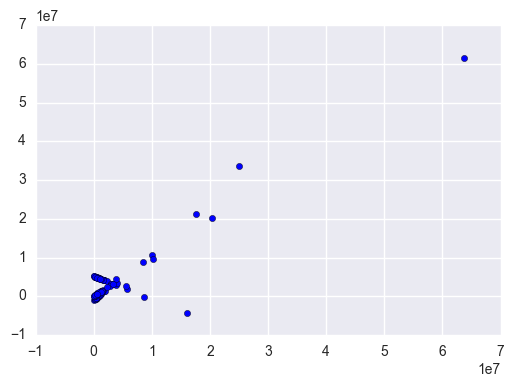

In [215]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics,linear_model
import patsy

y = merged2015['sale_dollars_all2015']
X = merged2015[['sale_dollars_2015Q1']]
X = sm.add_constant(X)

lm = linear_model.RidgeCV()
model = lm.fit(X, y)
# Perform 3-fold cross validation

scores = cross_val_score(model, X, y, cv=3)
print "Cross-validated scores:", scores
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=3)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy
print model.coef_

In [134]:
liq.head()

,date,store_number,address,city,zip_code,county_number,category,category_name,vendor_number,pack,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month
0,2015-11-20,2191,1013 MAIN,KEOKUK,52632,56.0,NaN,NaN,255,6,750,$27.14,6,162.84,4.50,2015,11
1,2015-11-21,2205,900 E WASHINGTON,CLARINDA,51632,73.0,NaN,NaN,255,6,750,$27.14,12,325.68,9.00,2015,11
2,2015-11-16,3549,1414 48TH ST,FORT MADISON,52627,56.0,NaN,NaN,130,20,150,$9.60,2,19.20,0.30,2015,11
3,2015-11-04,2513,812 S 1ST AVE,IOWA CITY,52240,52.0,NaN,NaN,65,3,1750,$53.34,3,160.02,5.25,2015,11
4,2015-11-17,3942,104 HIGHWAY 30 WEST,TOLEDO,52342,86.0,NaN,NaN,130,20,150,$9.60,2,19.20,0.30,2015,11


In [197]:
float(liq.county_number[liq.year == '2015'].isnull().sum())/len(liq.county_number[liq.year == '2015'])

0.0005122493514483747